<a href="https://colab.research.google.com/github/rangaraju1/ML-Projects/blob/main/Food_Hub_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
geopandas 1.1.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
opencv-python 4.12.0

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Mounting the Google drive which contains the notebook and the csv file.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the foodhub_order.csv data file to a pandas dataframe named df.

path = '/content/drive/MyDrive/PythonCourseTexasUniv/FoodHubProject/foodhub_order.csv'
df = pd.read_csv(path)


In [4]:
# View the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Calculating th number of rows and columns in the dataset.
print(df.shape)

rows,columns = df.shape
print(f"The dataset comprises {rows} properties described across {columns} attributes")

(1898, 9)
The dataset comprises 1898 properties described across 9 attributes


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Determine the data type for each feature/column
data_types = df.dtypes
print(data_types)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations:


Observations: There are 4 columns of type int64, one column of type float64 and 4 columns of type object/string.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Visualizing missing values.
missing_data = df.isnull().sum()
print(missing_data)
missing_percentage = (missing_data / len(df)) * 100
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data,
'Percentage': missing_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
# Display columns with missing values
print(missing_info[missing_info['Missing Values'] > 0])

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


#### Observations:


Observations: There is no missing values in the rows or columns of this dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Use the describe function to get a statistical summary of the data.
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


Observations: The minimum time for food preparation is 20 minutes, the average time is 27.37 minutes and the maximum time is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# How many orders have no ratings or missing values.
print(df['rating'].unique())
print(df['rating'].value_counts())
df[df['rating'] == 'Not given'].shape[0]





['Not given' '5' '3' '4']
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


736

Observation: There are 736 orders with "Not given" rating.

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

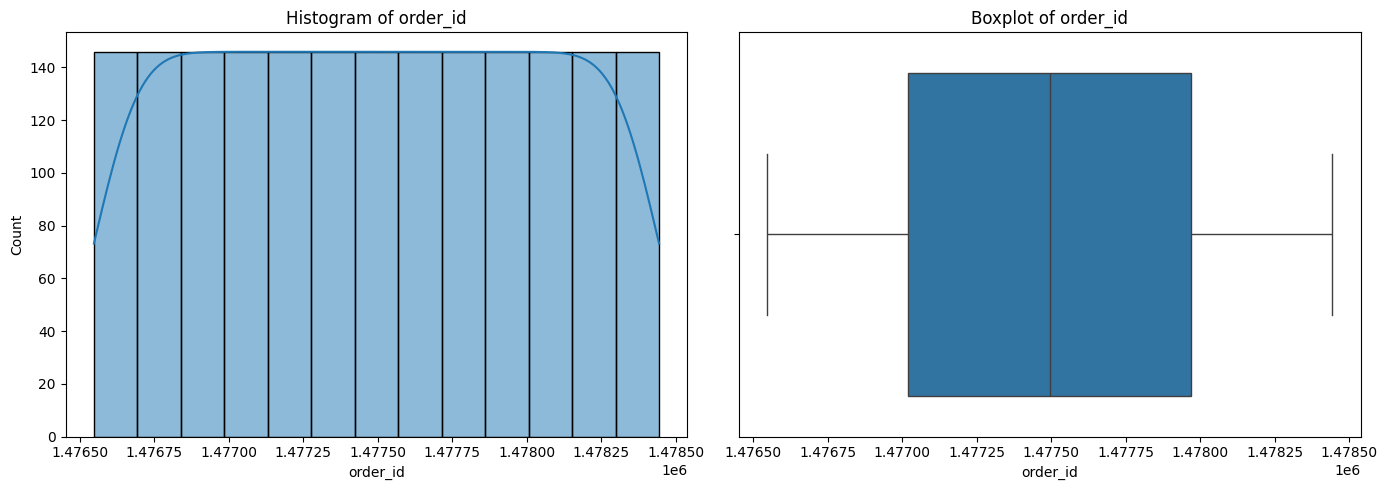

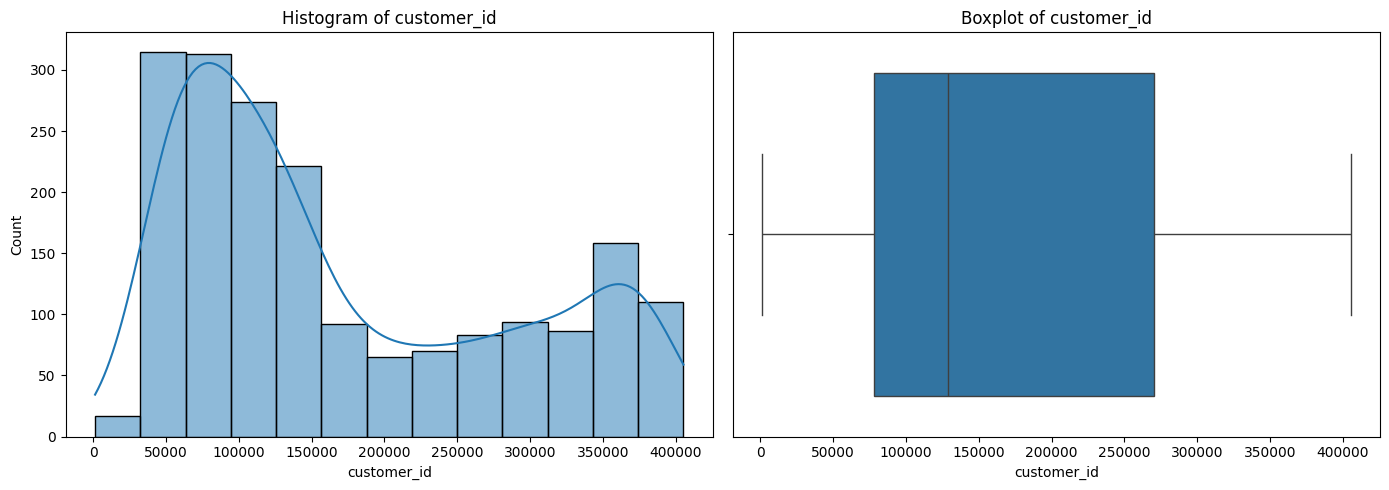

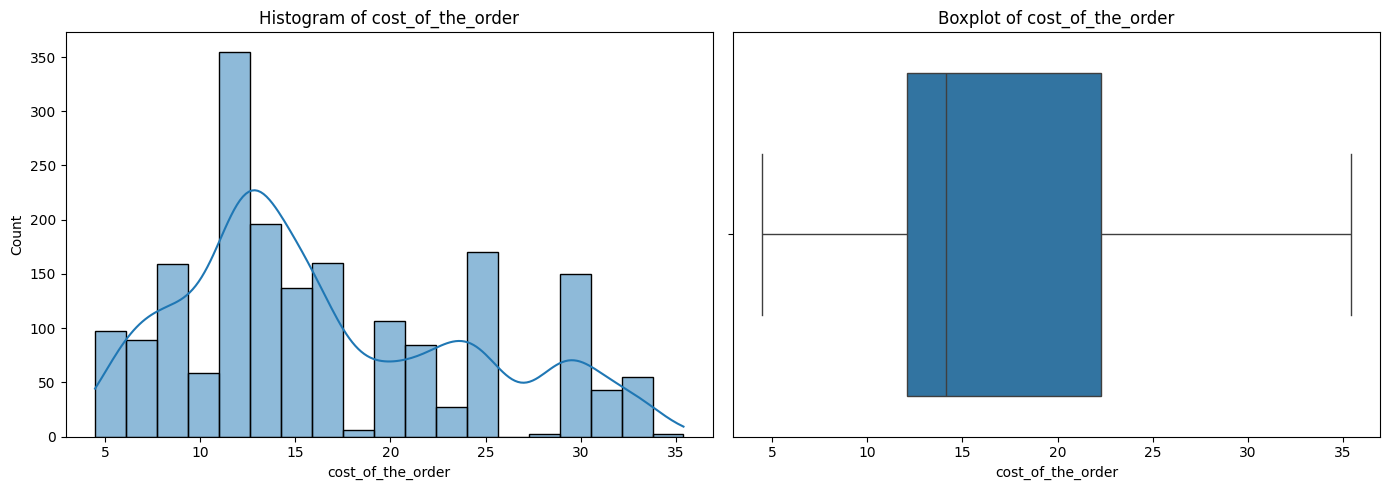

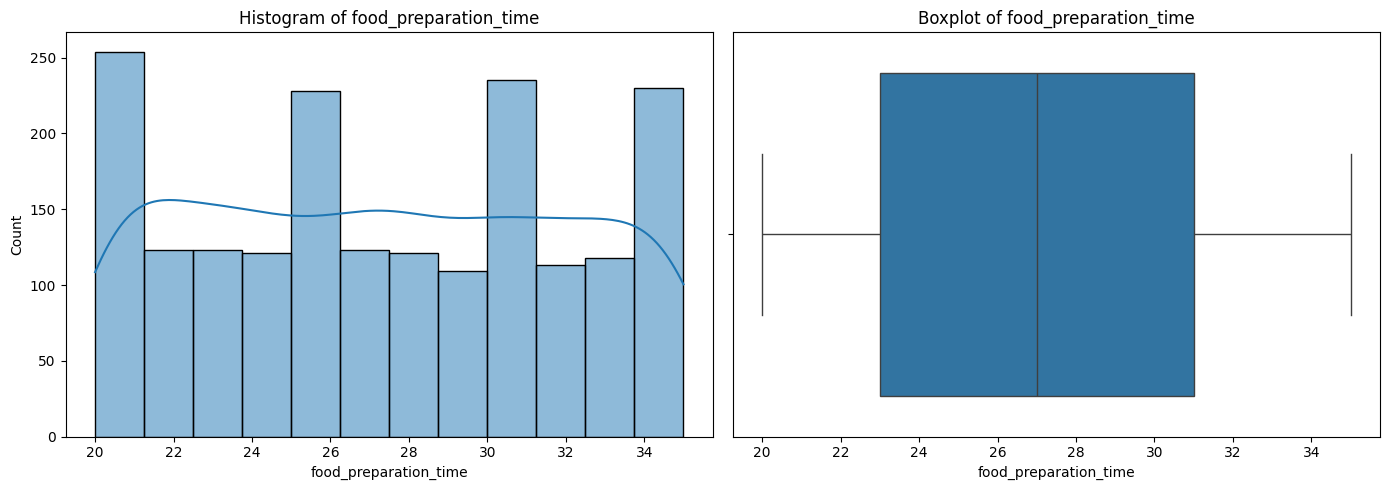

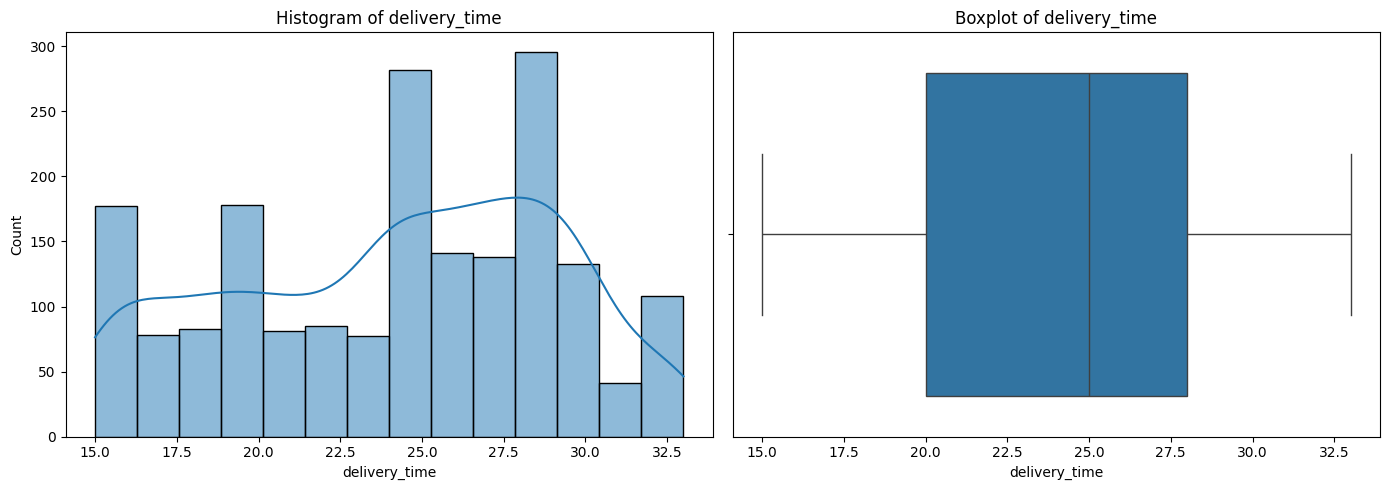

/tmp/ipython-input-10-4081102670.py:29: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-4081102670.py:29: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


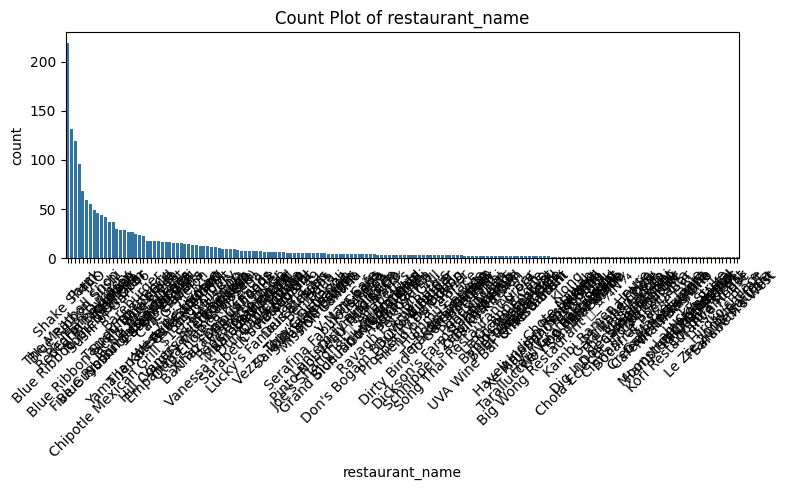

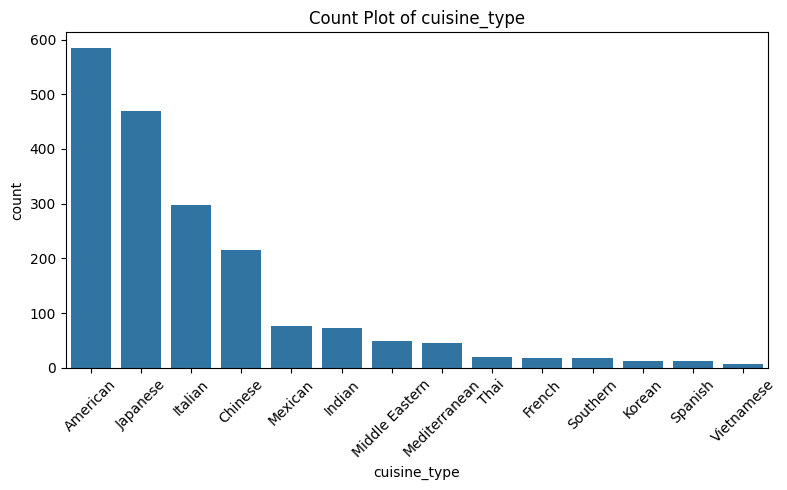

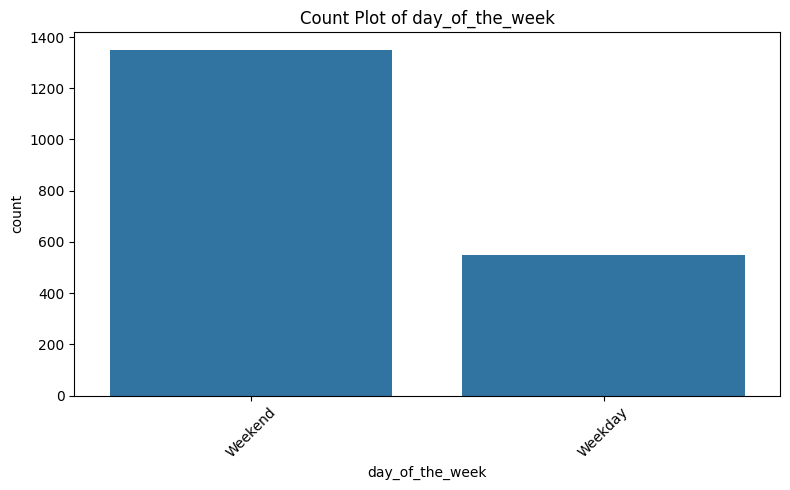

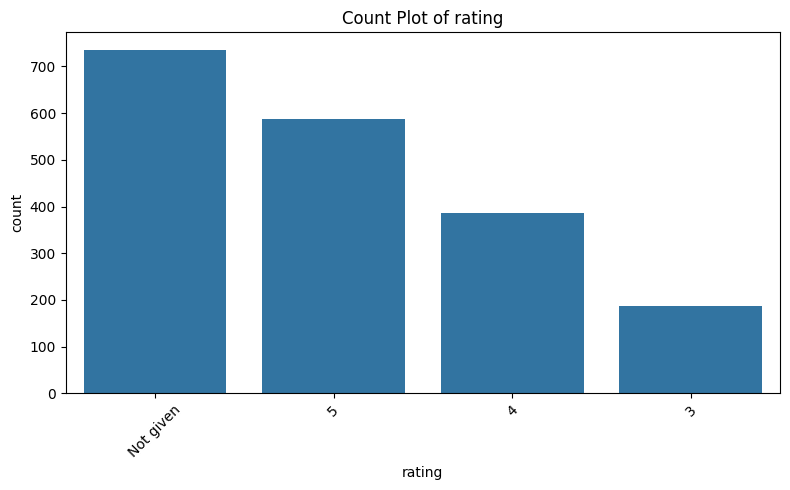

In [10]:
# For columns with numeric values, we can use histograms and boxplots to understand the distribution.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# For categorical attributes/columns we will use count plots:

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Observations: We used a 1-row, 2-column layout for numeric columns in the above plots. Most orders cost between $11 and $12. Foos preparation time varies between 20 - 35 minutes.  Delivery time is between 15 to 33 minutes. American cusine is the most ordered food type. More food orders were placed on Weekends than on Weekdays. Many customers have not given a rating.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [11]:
# Which are the top 5 restaurants in terms of the number of orders received
top_five_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_five_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


Observation: Shake Shack restaurant seems to be a very popular restaurant.

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [12]:
# Filter for weekend orders
weekend_df = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine
most_popular_cuisine = weekend_df['cuisine_type'].value_counts().idxmax()

print("Most popular cuisine on weekends:", most_popular_cuisine)


Most popular cuisine on weekends: American


Most popular cuisine on weekends is American cuisine.

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [13]:
# Calculate the Total number of orders
total_orders = df.shape[0]

# Orders with cost more than $20
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Calculate percentage of orders that cost more than $20
cal_percent = (orders_above_20 / total_orders) * 100

print(f"Percentage of orders costing more than $20: {cal_percent:.2f}%")


Percentage of orders costing more than $20: 29.24%


Nearly 30% of the orders cost more than $20.

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [14]:
# mean delivery time
df['delivery_time'].mean()

np.float64(24.161749209694417)

The average time to deliver the food is 24 minutes.

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [15]:
# Write the code here
top_three_customers = df['customer_id'].value_counts().head(3)
print(top_three_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


value_counts and head() can be used to get the data.

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


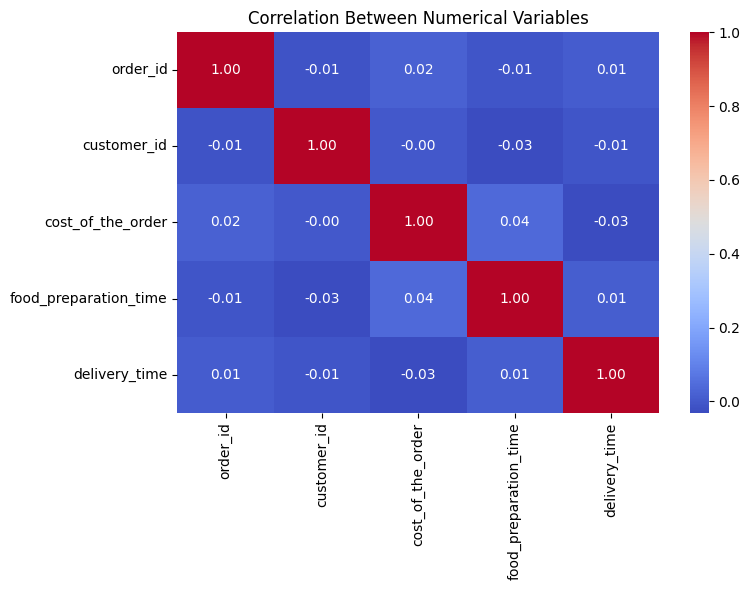

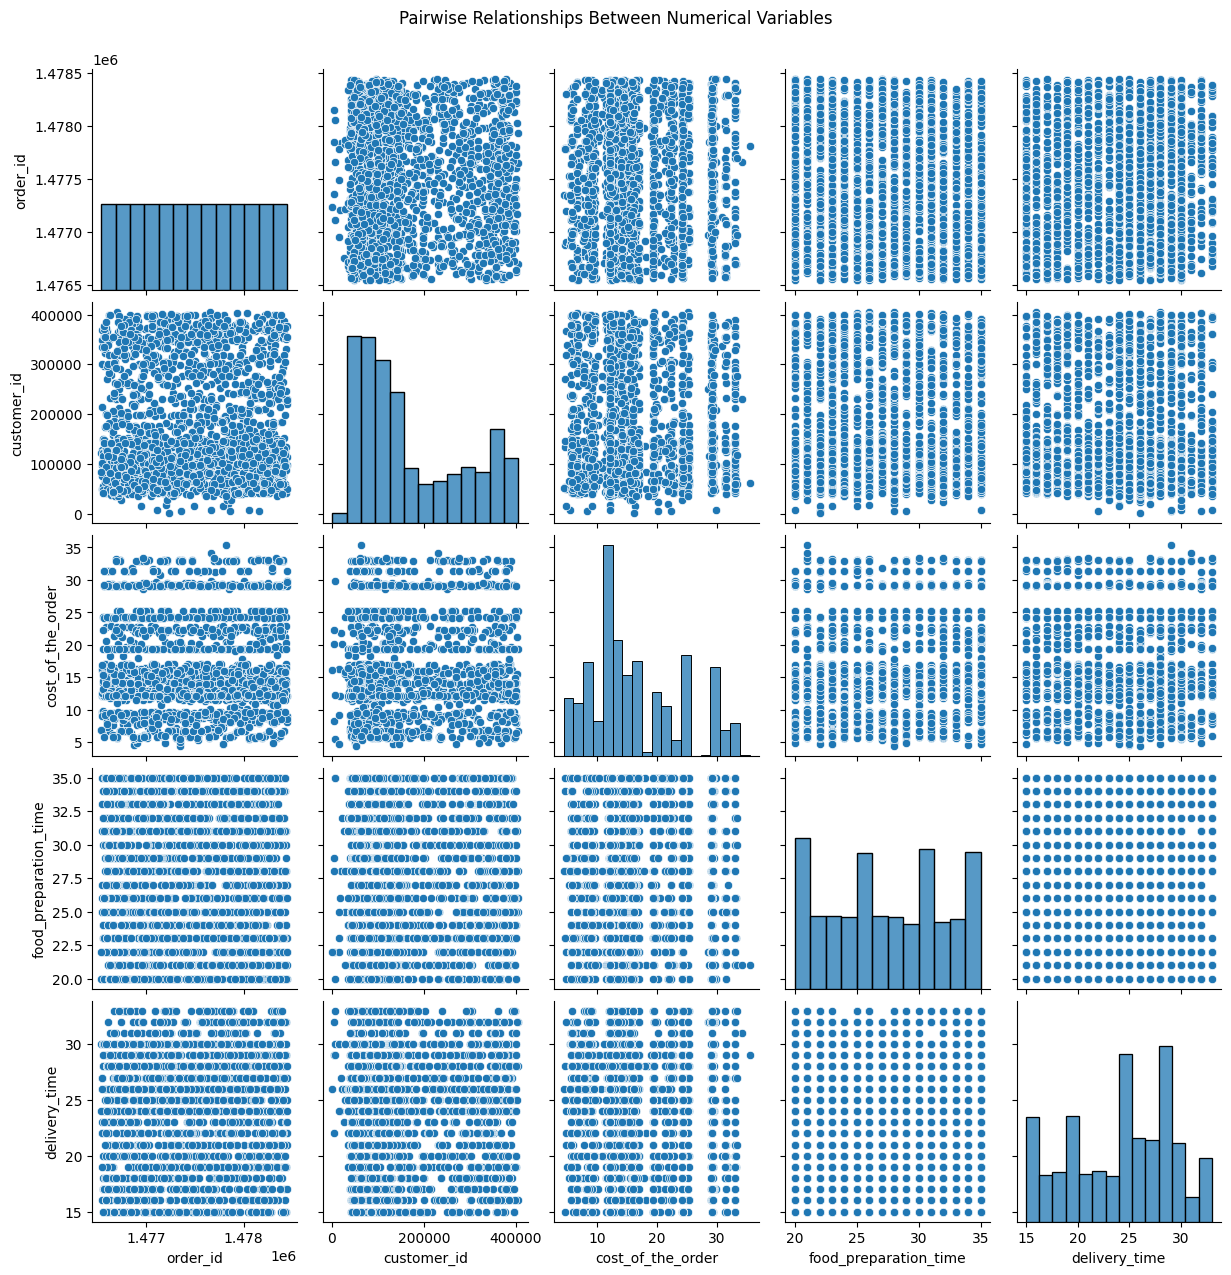

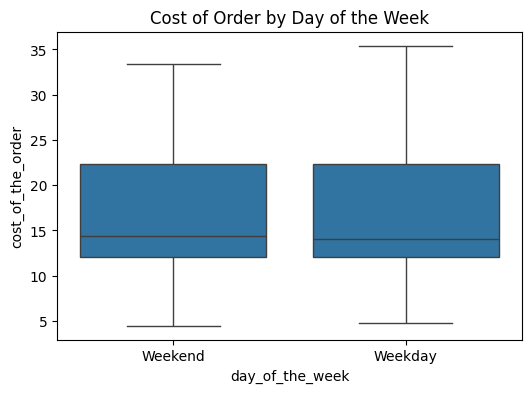

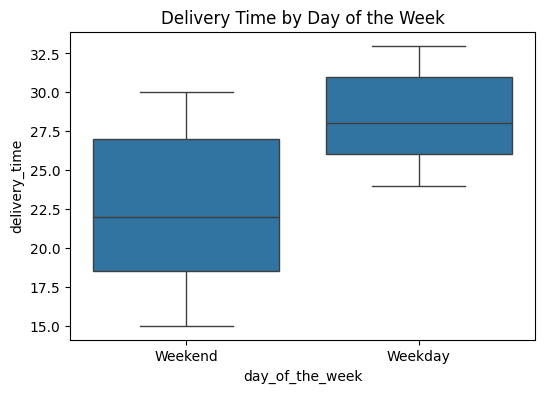

Top 10 cuisines: ['American', 'Japanese', 'Italian', 'Chinese', 'Mexican', 'Indian', 'Middle Eastern', 'Mediterranean', 'Thai', 'French']
Filtered rows for rating and cuisine: 1129
Average ratings:
 cuisine_type
Mediterranean     4.218750
Middle Eastern    4.235294
American          4.298913
French            4.300000
Chinese           4.338346
Italian           4.360465
Japanese          4.373626
Mexican           4.416667
Indian            4.540000
Thai              4.666667
Name: rating, dtype: float64


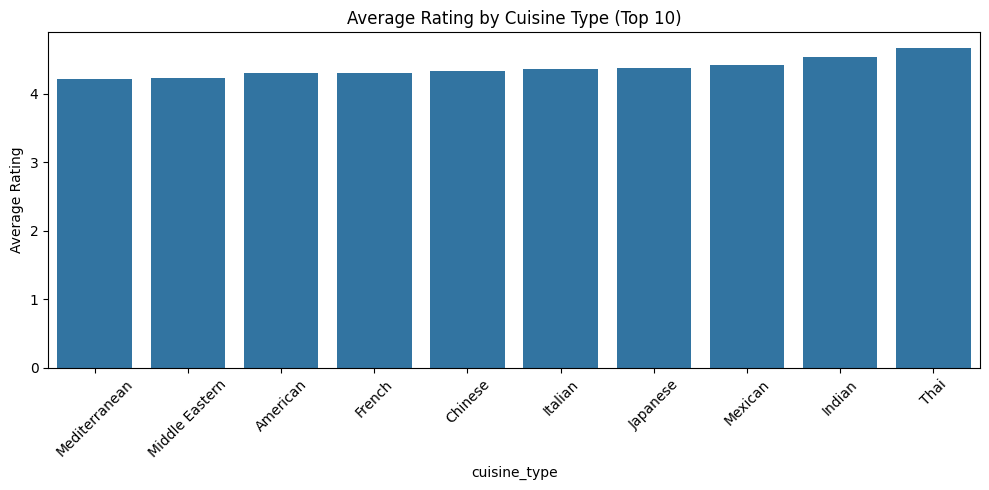

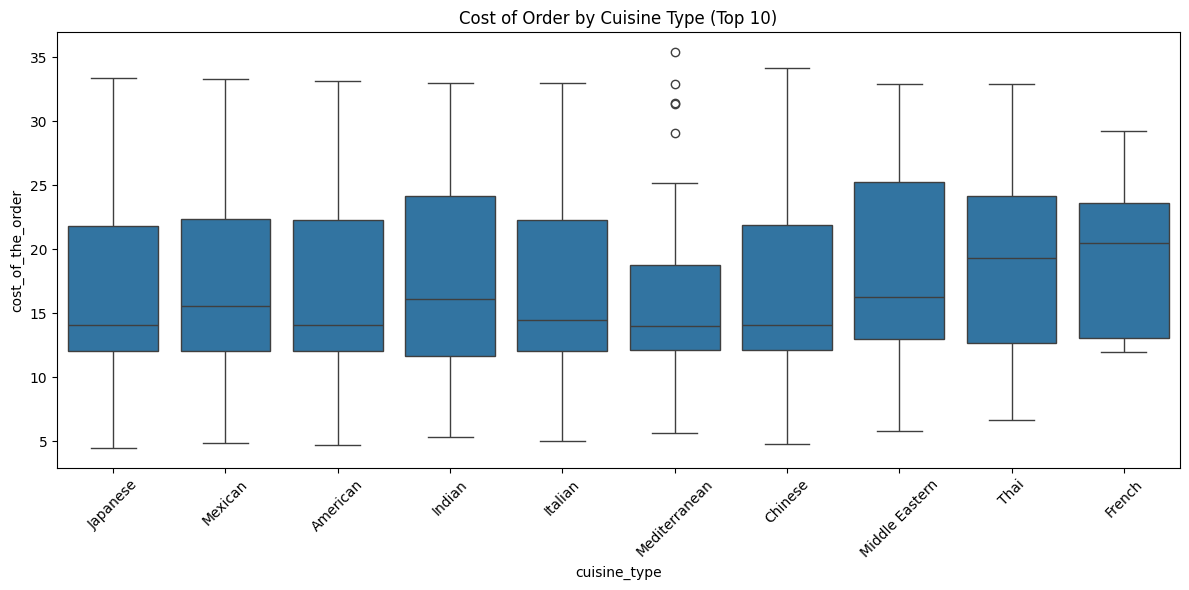


Group Means by Day of the Week:
                     order_id    customer_id  cost_of_the_order  \
day_of_the_week                                                   
Weekday          1.477483e+06  173010.771481          16.311188   
Weekend          1.477500e+06  170422.561066          16.574833   

                 food_preparation_time  delivery_time  
day_of_the_week                                        
Weekday                      27.212066      28.340037  
Weekend                      27.436714      22.470022  

Group Means by Top 10 Cuisine Types:
                    order_id    customer_id  cost_of_the_order  \
cuisine_type                                                     
American        1.477489e+06  184169.683219          16.319829   
Chinese         1.477530e+06  180480.855814          16.305209   
French          1.477438e+06  158138.722222          19.793889   
Indian          1.477493e+06  162106.397260          16.919726   
Italian         1.477528e+06  159568.305

In [19]:
# -------------------------------
# 1. Relationship Between Numerical Variables
# -------------------------------
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Correlation matrix
corr_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Variables")
plt.tight_layout()
plt.show()

# Pairplot for visual inspection
sns.pairplot(df[numerical_cols].dropna())
plt.suptitle("Pairwise Relationships Between Numerical Variables", y=1.02)
plt.show()

# -------------------------------
# 2. Numerical vs Categorical Analysis
# -------------------------------

# Boxplot: Cost vs Day of the Week
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.title("Cost of Order by Day of the Week")
plt.show()

# Boxplot: Delivery Time vs Day of the Week
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Delivery Time by Day of the Week")
plt.show()

# Bar plot: Average rating per cuisine (top 10)
# Ensure 'rating' column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 1: Get top 10 cuisine types by count
top_cuisines = df['cuisine_type'].value_counts().head(10).index
print("Top 10 cuisines:", top_cuisines.tolist())  # Debugging help

# Step 2: Filter rows where cuisine is in top 10 and rating is not null
filtered_df = df[df['cuisine_type'].isin(top_cuisines) & df['rating'].notna()]
print("Filtered rows for rating and cuisine:", filtered_df.shape[0])  # Debugging help

# Step 3: Group by cuisine_type and compute average rating
avg_rating = filtered_df.groupby('cuisine_type')['rating'].mean().sort_values()
print("Average ratings:\n", avg_rating)  # Debugging help

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating.index, y=avg_rating.values)
plt.xticks(rotation=45)
plt.title("Average Rating by Cuisine Type (Top 10)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

# Boxplot: Cost vs Cuisine Type (top 10 cuisines)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['cuisine_type'].isin(top_cuisines)], x='cuisine_type', y='cost_of_the_order')
plt.title("Cost of Order by Cuisine Type (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 3. Group Statistics
# -------------------------------

# Mean values by Day of Week
print("\nGroup Means by Day of the Week:")
print(df.groupby('day_of_the_week')[numerical_cols].mean())

# Mean values by Cuisine Type (Top 10)
print("\nGroup Means by Top 10 Cuisine Types:")
print(df[df['cuisine_type'].isin(top_cuisines)].groupby('cuisine_type')[numerical_cols].mean())


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [20]:
# Write the code here

# Convert 'rating' column to numeric (replace 'Not given' with NaN)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant_name and calculate:
# - count of ratings
# - mean (average) of ratings
rating_summary = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants with:
# - more than 50 ratings
# - average rating greater than 4
promo_eligible = rating_summary[(rating_summary['count'] > 50) & (rating_summary['mean'] > 4)]

# Sort the eligible restaurants by average rating (descending)
promo_eligible_sorted = promo_eligible.sort_values(by='mean', ascending=False)

# Reset index to make restaurant_name a column again
promo_eligible_sorted.reset_index(inplace=True)

# Display the result
print("Restaurants eligible for promotional offer:")
print(promo_eligible_sorted)


Restaurants eligible for promotional offer:
             restaurant_name  count      mean
0          The Meatball Shop     84  4.511905
1  Blue Ribbon Fried Chicken     64  4.328125
2                Shake Shack    133  4.278195
3          Blue Ribbon Sushi     73  4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [21]:
# Write the code here
# Define commission calculation logic
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0.0

# Apply the function to each order
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate total revenue
total_revenue = df['commission'].sum()

# Print result
print(f"Total revenue generated by the company: ${total_revenue:.2f}")


Total revenue generated by the company: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [22]:
# Write the code here
# Calculate total time per order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count how many orders take more than 60 minutes
num_long_orders = (df['total_time'] > 60).sum()

# Total number of orders
total_orders = len(df)

# Calculate percentage of long orders
percentage_long_orders = (num_long_orders / total_orders) * 100

# Print result
print(f"Percentage of orders taking more than 60 minutes: {percentage_long_orders:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [23]:
# Write the code here
# Group by day_of_the_week and calculate mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print results
print("Mean Delivery Time by Day of the Week:")
print(mean_delivery_time)


Mean Delivery Time by Day of the Week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Conclusions & Recommendations
1. 🚚 Delivery Performance
Weekday deliveries take longer on average (28.34 min) than weekend deliveries (22.47 min).

~10.5% of orders take more than 60 minutes.

✅ Recommendation:

Increase delivery capacity or staffing on weekdays, especially during peak hours.

Investigate specific restaurants or cuisines that have high prep + delivery time.



### Recommendations:

*  Cuisine-Type Based Performance
Some cuisine types consistently get higher ratings than others.

✅ Recommendation:

Promote cuisine types with high average ratings and good delivery performance in marketing.

For cuisines with low average ratings, gather feedback, audit recipes, or re-train staff.

In [24]:
# Convert rating column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by cuisine and get average rating
avg_cuisine_rating = df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

print("Average rating by cuisine type:")
print(avg_cuisine_rating.head(10))


Average rating by cuisine type:
cuisine_type
Spanish     4.833333
Thai        4.666667
Indian      4.540000
Mexican     4.416667
Japanese    4.373626
Italian     4.360465
Chinese     4.338346
Southern    4.307692
French      4.300000
American    4.298913
Name: rating, dtype: float64


In [25]:
rating_summary = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
promo_eligible = rating_summary[(rating_summary['count'] > 50) & (rating_summary['mean'] > 4)]
promo_eligible_sorted = promo_eligible.sort_values(by='mean', ascending=False)
print(promo_eligible_sorted)


                           count      mean
restaurant_name                           
The Meatball Shop             84  4.511905
Blue Ribbon Fried Chicken     64  4.328125
Shake Shack                  133  4.278195
Blue Ribbon Sushi             73  4.219178


---

4. 💰 Revenue Insights
Most revenue is generated from orders over $20, where a 25% commission applies.

Total revenue from commissions is $6,166.30.

✅ Recommendation:

Encourage upselling to push order values above $20 (e.g., combo deals, add-ons).

Use dynamic promotions to nudge customers toward higher-value purchases.

In [26]:
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0.0

df['commission'] = df['cost_of_the_order'].apply(calculate_commission)
total_revenue = df['commission'].sum()
print(f"Total revenue: ${total_revenue:.2f}")


Total revenue: $6166.30


🧠 Customer Experience
Many orders have 'Not given' as rating — indicates low feedback participation.

✅ Recommendation:

Incentivize ratings with points or coupons.

Simplify the post-delivery feedback process.

In [27]:
# Code to Check Rating Availability:

missing_ratings = df['rating'].isna().sum()
print(f"Number of missing ratings: {missing_ratings}")

Number of missing ratings: 736
